## Rotational and translational invariant representation of periodic three-dimensional shapes: the DISH descriptor 

Author: _Angelo Ziletti (angelo.ziletti@gmail.com, ziletti@fhi-berlin.mpg.de)_

The code below allows to calculate the diffraction intensity in spherical harmonics (DISH) descriptor for crystal-structure classification.

A schematic of the procedure is shown below:

![dish_descriptor](./dish_image.png)



(a) For a given crystal structure, the three-dimensional diffraction pattern is calculated.    
(b) The actual three-dimensional diffraction pattern for a simple cubic structure is shown. Planes parallel to the $xy$, $yz$, and $xz$ directions are shown as guide to the eye.
(c) The three-dimensional diffraction intensity - which is volumetric data - is sliced in concentric shells around the origin.     
(d) Each spherical shell is expanded in spherical harmonics, and the rotational invariance quantity $\pi_l$ is calculated, as done in Ref. [1], for every $l$, up to a certain cutoff $l_{\rm max}$ ($l_{\rm max}=32$ in our case).        
(e) Combining the spherical harmonics representation of each concentric shell, a (two-dimensional) rotational invariant descriptor is obtained.    
(f) Example of diffraction intensity in spherical harmonics (DISH) descriptor for the most common crystal structure for elemental solids found in nature.

We will now how to calculate the DISH descriptor using *ai4materials*. 
Let us first load the libraries we need.

In [2]:
from ase.spacegroup import crystal
from ase.io import write
from ai4materials.descriptors.diffraction3d import DISH
from ai4materials.utils.utils_config import set_configs
from ai4materials.utils.utils_crystals import create_supercell
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random
from scipy import ndimage
%matplotlib inline  
# setup configs
configs = set_configs(main_folder='./dish_ai4materials')

/home/ziletti/anaconda2/lib/python2.7/site-packages/pymatgen/__init__.py:87: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")
Using Theano backend.


We then create a face-centered-cubic crystal structure, using the ASE package, create a supercell with 256 atoms, and then randomly rotate the structure.

In [3]:
# create the fcc aluminium structure
fcc_al = crystal('Al', [(0, 0, 0)], spacegroup=225, cellpar=[4.05, 4.05, 4.05, 90, 90, 90])
structure = create_supercell(fcc_al, target_nb_atoms=256)

# rotate randomly structure
angles = (random.random() * 360.0, random.random() * 360.0, random.random() * 360.0)
structure.rotate(angles[0], 'x', rotate_cell=True, center='COU')
structure.rotate(angles[1], 'y', rotate_cell=True, center='COU')
structure.rotate(angles[2], 'z', rotate_cell=True, center='COU')        

In [4]:
from ase.visualize import view
view(structure, viewer='x3d')

We can now calculate DISH with *ai4materials*. The result is stored in the diff3d_spectrum numpy array.

In [5]:
# calculate DISH 
descriptor = DISH(configs=configs)
structure_result = descriptor.calculate(structure)
diff3d_spectrum = descriptor.calculate(structure).info['descriptor']['diffraction_3d_sh_spectrum']

Since DISH is a two-dimensional array, we can visualize it as an image. In particular, we will visualize it as a heatmap.

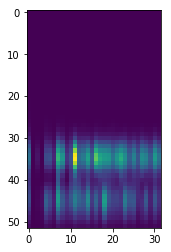

In [8]:
img = plt.imshow(diff3d_spectrum)
img

## Reference:
[1] M. Kazhdan, T. Funkhouser, and S. Rusinkiewicz, [Rotation Invariant Spherical Harmonic Representation of 3D Shape Descriptors](http://www.cs.jhu.edu/~misha/MyPapers/SGP03.pdf), Eurographics Symposium on Geometry Processing (2003) 

[2] A. Ziletti, A. Leitherer, M. Scheffler, and L. M. Ghiringhelli, to be submitted (2018).